# Blatt 04

## Aufgabe 10
### a.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm # zum Erzeugen von Wartebalken in der Ausgabe
np.random.seed(0)

In [2]:
## Daten der ersten Verteilung
mu_x_0 = 0
mu_y_0 = 3
sigma_x_0 = 3.5
sigma_y_0 = 2.6
roh_0 = 0.9

## Daten der zweiten Population
mu_x_1 = 6
sigma_x_1 = 3.5

## Daten der zweiten Verteilung in Abhängigkit von x
a = -0.5
b = 0.6

Werte der zweiten Verteilung bestimmen mit Hilfe von:
$$E(y|x) = \rho\frac{\sigma_y}{\sigma_x}(x-\mu_x)+\mu_y = a + b\cdot x\qquad (1)$$
und
$$\text{Var}[y|x] = \int_{-\infty}^{\infty}(y - E(y|x))^2\cdot f(y|x)\text{d}y \qquad (2),$$mit
$$f(y|x) = \frac{1}{\sqrt{2\pi\cdot(1 - \rho^2)}\sigma_y}\exp{\left(\frac{-1}{2(1-\rho^2)}\left[\frac{\tilde{y}}{\sigma_y} - \rho\frac{\tilde{x}}{\sigma_x}\right]^2\right)},$$wobei
$$\tilde{y} = y - \mu_y,\qquad \tilde{x} = x - \mu_x$$

Aus (1) folgt durch Koeffizientenvergleich:

$$\text{Konstanten}:\qquad a = -\rho\frac{\sigma_y}{\sigma_x}\mu_x + \mu_y$$
$$x: \qquad b = \rho\frac{\sigma_y}{\sigma_x}$$
$$\Rightarrow \mu_y = a + b\mu_x = 3,1$$

Nun (2) ausrechnen und mit der Angabe vom Blatt $\text{Var}[y|x] = 1$ gleichsetzen.

$$\text{Var}[y|x] = \int_{-\infty}^{\infty}(y^2 - 2y\cdot E(y|x) + E(y|x)^2)\cdot f(y|x)\text{d}y\qquad (3)$$

Der lineare Term $- 2y\cdot E(y|x)$ in (3) ist gleich Null, da eine ungerade Funktion über $(-\infty,\infty)$ 
integriert Null ergibt.
Der Term $E(y|x)^2$ in (3) reproduziert sich einfach, da 
$$\int_{-\infty}^{\infty}f(y|x)\text{d}y = 1$$
aufgrund der Normierung.

Für den quadatischen Term $y^2$ in (3) wird folgende Nebenrechnung gemacht:
$$\int_{-\infty}^{\infty}y^2\cdot f(y|x)\text{d}y$$
$$ = \int_{-\infty}^{\infty}(\tilde{y} + \mu_y)^2\cdot\frac{1}{\sqrt{2\pi\cdot(1 - \rho^2)}\sigma_y}\exp{\left(\frac{-1}{2(1-\rho^2)}\left[\frac{\tilde{y}}{\sigma_y} - \rho\frac{\tilde{x}}{\sigma_x}\right]^2\right)}\text{d}y$$

$$ = \int_{-\infty}^{\infty}\left(\hat{y} + \mu_y + \rho\frac{\tilde{x}\sigma_y}{\sigma_x}\right)^2\cdot\frac{1}{\sqrt{2\pi\cdot(1 - \rho^2)}\sigma_y}\exp{\left(\frac{-1}{2\sigma_y^2(1-\rho^2)}\hat{y}^2\right)}\text{d}y,$$
mit
$$\hat{y} = \tilde{y} + \rho\frac{\tilde{x}\sigma_y}{\sigma_x}$$
Ausrechnen des Gaußintegrals führt auf:
$$\int_{-\infty}^{\infty}y^2\cdot f(y|x)\text{d}y = \left(\mu_y + \rho\frac{\tilde{x}\sigma_y}{\sigma_x}\right)^2 + \sigma_y^2(1 - \rho^2)$$

Zusammenfassend ergibt sich aus (3) somit:

$$(3) = \mu_y^2 + 2\rho\frac{\sigma_y}{\sigma_x}(x - \mu_x) + \rho^2\frac{\sigma_y^2}{\sigma_x^2}(x^2 - 2\mu_xx + \mu_x^2) + \sigma_y^2(1 - \rho^2) + a^2 + 2abx + b^2x^2 \stackrel{!}{=} 1$$

Erneuter Koeffizientenvergleich führt auf:

$$x^2:\qquad b^2 = \rho^2\frac{\sigma_y^2}{\sigma_x^2}\quad\Leftrightarrow \rho = b\frac{\sigma_x}{\sigma_y}$$
$$x:\qquad 2ab = 2\mu_y\rho\frac{\sigma_y}{\sigma_x} - 2\mu_x\rho^2\frac{\sigma_y^2}{\sigma_x^2}$$
$$\text{Konstanten}: \qquad \mu_y^2 - 2\mu_y\rho\frac{\sigma_y}{\sigma_x} + 2\mu_x^2\rho^2\frac{\sigma_y^2}{\sigma_x^2} + \sigma_y^2(1 - \rho^2) + a^2 = 1$$
$$\Leftrightarrow \sigma_y = \sqrt{\mu_y^2 -2b\mu_x\mu_y + b^2\mu_x^2 + a^2 + b^2\sigma_x^2 - 1} = 2,3$$
$$\Rightarrow \rho \approx 0,91$$

In [3]:
# Gefundene Größen der zweiten Population ausrechnen:
mu_y_1 = a + b * mu_x_1
sigma_y_1 = np.sqrt(mu_y_1**2-2*b*mu_x_1*mu_y_1+b**2*mu_x_1**2+a**
                    -1+b**2*sigma_x_1**2)
sigma_y_1 = 2.3
roh_1 = b * sigma_x_1 / sigma_y_1

print(f'mu_y_1: {mu_y_1} \nsigma_y_1: {sigma_y_1} \nroh_1: {roh_1}')

mu_y_1: 3.0999999999999996 
sigma_y_1: 2.3 
roh_1: 0.9130434782608696


### b.)

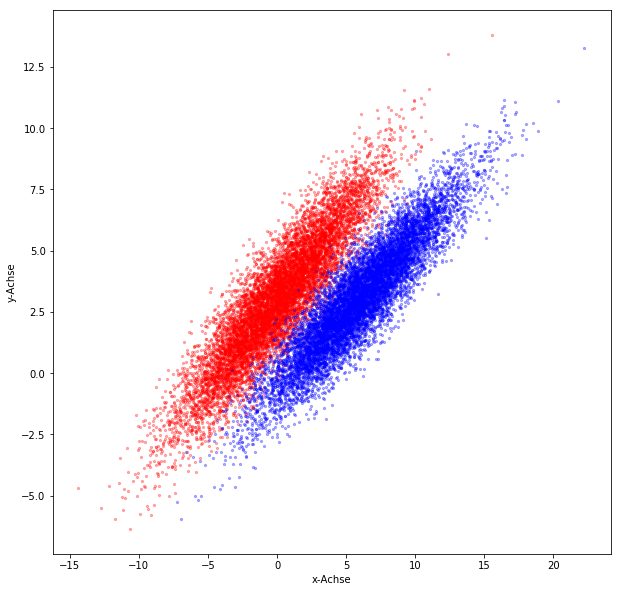

In [4]:
# Populationgröße festlegen
Anzahl = int(1e4)

# Zufallszahlen für Population 0 ziehen
mean_0 = [mu_x_0, mu_y_0]
cov_0 = [[sigma_x_0**2, roh_0 * sigma_x_0 * sigma_y_0],
       [roh_0 * sigma_x_0 * sigma_y_0, sigma_y_0**2]]
population_0 = np.random.multivariate_normal(mean_0, cov_0, Anzahl)

# Zufallszahlen für Population 1 ziehen
mean_1 = [mu_x_1, mu_y_1]
cov_1 = [[sigma_x_1**2, roh_1 * sigma_x_1 * sigma_y_1],
       [roh_1 * sigma_x_1 * sigma_y_1, sigma_y_1**2]]
population_1 = np.random.multivariate_normal(mean_1, cov_1, Anzahl)

# Scatter-Plot erstellen
plt.figure(figsize = [10, 10])
plt.xlabel(r'x-Achse')
plt.ylabel(r'y-Achse')
plt.scatter(population_0[:, 0], population_0[:, 1],
            color = 'r', label = r'Population 0', s=5, alpha=0.3)
plt.scatter(population_1[:, 0], population_1[:, 1],
            color = 'b', label = r'Population 1', s=5, alpha=0.3)
plt.show()

### c.)

In [5]:
## Berechnen der Parameter der Stichprobe

## Population 0

# Mittelwerte und Standardabweichungen berechnen
mu_x_probe_0 = np.mean(population_0[:, 0])
mu_y_probe_0 = np.mean(population_0[:, 1])
sigma_x_probe_0 = np.std(population_0[:, 0])
sigma_y_probe_0 = np.std(population_0[:, 1])

print(' Daten der Stichprobe 0:\n\n', f'mu_x_probe_0: {mu_x_probe_0: .2}', '\n', f'mu_y_probe_0: {mu_y_probe_0: .2}','\n'
      f' sigma_x_probe_0: {sigma_x_probe_0: .2}', '\n', f'sigma_y_probe_0: {sigma_y_probe_0: .2}')

 Daten der Stichprobe 0:

 mu_x_probe_0:  0.035 
 mu_y_probe_0:  3.0 
 sigma_x_probe_0:  3.5 
 sigma_y_probe_0:  2.6


In [6]:
## Population 1

# Mittelwerte und Standardabweichungen berechnen
mu_x_probe_1 = np.mean(population_1[:, 0])
mu_y_probe_1 = np.mean(population_1[:, 1])
sigma_x_probe_1 = np.std(population_1[:, 0])
sigma_y_probe_1 = np.std(population_1[:, 1])

print(' Daten der Stichprobe 1:\n\n',f'mu_x_probe_1: {mu_x_probe_1: .2}', '\n', f'mu_y_probe_1: {mu_y_probe_1: .2}','\n'
      f' sigma_x_probe_1: {sigma_x_probe_1: .2}', '\n', f'sigma_y_probe_1: {sigma_y_probe_1: .2}')

 Daten der Stichprobe 1:

 mu_x_probe_1:  6.0 
 mu_y_probe_1:  3.1 
 sigma_x_probe_1:  3.5 
 sigma_y_probe_1:  2.3


In [7]:
## Ergebnisse für die gemeinsame Stichprobe

# Array aneinander anfügen
population_01 = np.array([np.append(population_0[:, 0], population_1[:, 0]),
                         np.append(population_0[:, 1], population_1[:, 1])])

# Mittelwerte und Standardabweichungen berechnen
mu_x_probe_01 = np.mean(population_01[:, 0])
mu_y_probe_01 = np.mean(population_01[:, 1])
sigma_x_probe_01 = np.std(population_01[:, 0])
sigma_y_probe_01 = np.std(population_01[:, 1])

print(' Daten der gemeinsamen Stichprobe:\n\n',f'mu_x_probe_01: {mu_x_probe_01: .2}', '\n', f'mu_y_probe_01: {mu_y_probe_01: .2}','\n'
      f' sigma_x_probe_01: {sigma_x_probe_01: .2}', '\n', f'sigma_y_probe_01: {sigma_y_probe_01: .2}')

 Daten der gemeinsamen Stichprobe:

 mu_x_probe_01: -3.7 
 mu_y_probe_01: -1.2 
 sigma_x_probe_01:  2.6 
 sigma_y_probe_01:  3.4


### d.)

In [8]:
# Generiere Population 2 mit 1000 Datenpunkten und den Eigenschaften von Population 0
Anzahl_2 = 1000
mean_2 = [mu_x_0, mu_y_0]
cov_2 = [[sigma_x_0**2, roh_0 * sigma_x_0 * sigma_y_0],
       [roh_0 * sigma_x_0 * sigma_y_0, sigma_y_0**2]]

population_2 = np.random.multivariate_normal(mean_0, cov_0, Anzahl_2)

# DataFrame für Polulation 0 und 1
populationen_0_u_1 = pd.DataFrame({
    'Population 0 x-Werte': population_0[:, 0],
    'Population 0 y-Werte': population_0[:, 1],
    'Population 1 x-Werte': population_1[:, 0],
    'Population 1 y-Werte': population_1[:, 1],
})

# DataFrame für Population 2
populationen_2 = pd.DataFrame({
    'Population 2 x-Werte': population_2[:, 0],
    'Population 2 y-Werte': population_2[:, 1],
})

# DataFrame mit verschieden langen Arrays
populationen = pd.concat([populationen_0_u_1, populationen_2],
                         ignore_index=False, axis=1)

# erstelle HDF5 file mit 6 Keys (wie kann man das mit nur drei keys lösen?)
populationen.to_hdf('data.hdf5', key='populationen')

## Aufgabe 11

Die Aufgabe ist per Hand als `.pdf` mit dem Namen `Aufgabe_11_blatt_4.pdf` in unserer Abgabe angehangen.

### a.)

In [9]:
pop_0 = np.array([[1, 2, 1.5, 2, 2, 3],
                 [1, 1, 2, 2, 3, 3]])
pop_1 = np.array([[1.5, 2.5, 3.5, 2.5, 3.5, 4.5],
                 [1, 1, 1, 2, 2, 2]])

In [10]:
mean_pop_0 = np.array([[np.mean(pop_0[0])], [np.mean(pop_0[1])]])
mean_pop_1 = np.array([[np.mean(pop_1[0])], [np.mean(pop_1[1])]])
print(f'Mittelwert der Population 0: {mean_pop_0}\n Mittelwert der Population 1: {mean_pop_1}')

Mittelwert der Population 0: [[1.91666667]
 [2.        ]]
 Mittelwert der Population 1: [[3. ]
 [1.5]]


In [11]:
S_0 = np.matmul(pop_0 - mean_pop_0, np.transpose(pop_0 - mean_pop_0))
S_1 = np.matmul(pop_1 - mean_pop_1, np.transpose(pop_1 - mean_pop_1))

S_W = S_0 + S_1
S_B = np.matmul(mean_pop_0 - mean_pop_1,
                np.transpose(mean_pop_0 - mean_pop_1))

print(f'S_W = {S_W} \n\n S_B = {S_B}')

S_W = [[7.70833333 3.5       ]
 [3.5        5.5       ]] 

 S_B = [[ 1.17361111 -0.54166667]
 [-0.54166667  0.25      ]]


### b.)

In [12]:
lambda_max = np.matmul(np.linalg.inv(S_W), mean_pop_0 - mean_pop_1)
lambda_ev = 1 / np.linalg.norm(lambda_max) * lambda_max
print(f'normierter Vektor lambda: {lambda_ev}')
x_werte = np.linspace(-3.5, 2.5)

normierter Vektor lambda: [[-0.70997922]
 [ 0.70422263]]


### c.) und d.)
Projektionen auf $\vec{\lambda}$ bestimmen.

In [13]:
def projektion(x, _lambda):
    buffer_x = []
    buffer_y = []
    buffer = []
    for i in range(len(x[0])):
        buffer_x.append(x[0, i] * _lambda[0])
        buffer_y.append(x[1, i] * _lambda[1])
    return [x + y for x, y in zip(buffer_x, buffer_y)]

# Projektion der Population 0 auf lambda
projektion_pop_0 = projektion(pop_0, lambda_ev)

# Projektion der Population 1 auf lambda
projektion_pop_1 = projektion(pop_1, lambda_ev)

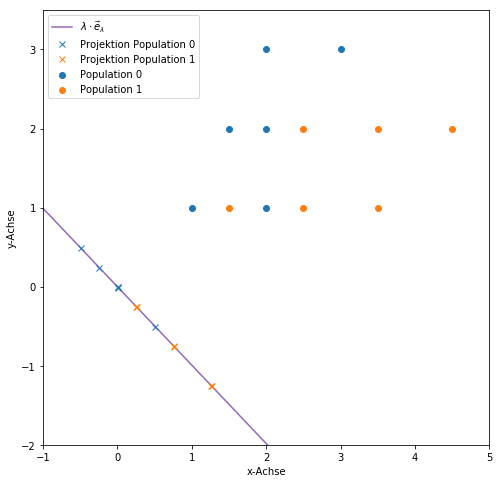

<Figure size 432x288 with 0 Axes>

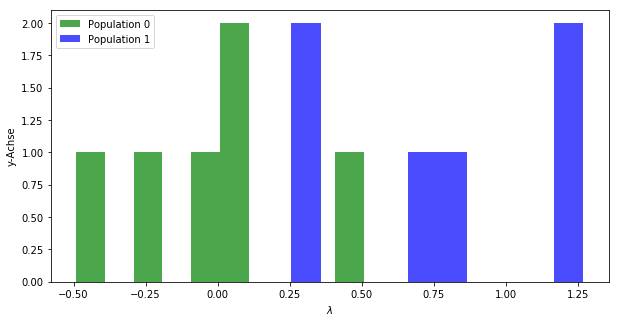

In [14]:
## Plotten der Daten aus der Diskriminanzanalyse

plt.figure(figsize = [8, 8])
plt.plot(x_werte * lambda_ev[0], x_werte * lambda_ev[1],
         color = 'C4', label = r'$\lambda\cdot\vec{e}_{\lambda}$')
plt.plot(projektion_pop_0 * lambda_ev[0], projektion_pop_0 * lambda_ev[1], 'x',
         label = 'Projektion Population 0', color = 'C0')
plt.plot(projektion_pop_1* lambda_ev[0], projektion_pop_1 * lambda_ev[1], 'x',
         label = 'Projektion Population 1', color = 'C1')
plt.scatter(pop_0[0], pop_0[1],
            label = 'Population 0', color = 'C0')
plt.scatter(pop_1[0], pop_1[1],
            label = 'Population 1', color = 'C1')
plt.xlim(-1, 5)
plt.ylim(-2, 3.5)
plt.xlabel('x-Achse')
plt.ylabel('y-Achse')
plt.legend(loc = 'best')
plt.show()

plt.clf()
plt.figure(figsize = [10, 5])
plt.hist(projektion_pop_0 * lambda_ev[0], alpha = 0.7,
         label = 'Population 0', color=r'g', bins = 10)
plt.hist(projektion_pop_1 * lambda_ev[0], alpha = 0.7,
         label = 'Population 1', color=r'b', bins = 10)
plt.xlabel(r'$\lambda$')
plt.ylabel('y-Achse')
plt.legend(loc = 'upper left')
plt.show()

### e.)
Wähle geeignetes $\lambda_{cut}$ und bestimme die dazugehörige Effizienz und Reinheit für Population 0.

Wähle $\lambda_{cut} = 0,20$.

In [15]:
tp = 5
fp = 0
fn = 1

E = tp / (tp + fp)
R = tp / (fn + tp)

print(f'Effizienz: {E:.2}')
print(f'Reinheit: {R:.2}')

Effizienz: 1.0
Reinheit: 0.83


## Aufgabe 12

Lese die `.HDF5` Datei ein.

In [16]:
Population_0 = pd.read_hdf('./zwei_populationen.h5', key='P_0_10000')
Population_1 = pd.read_hdf('./zwei_populationen.h5', key='P_1')

Bezeichne im Folgenden die Population `P_0_10000` als `Population_0`
und `P_1` als `Population_1`.

### a.)

In [17]:
# Mittelwerte bestimmen
mu_population_0 = Population_0.mean()
mu_population_1 = Population_1.mean()

print(f'Mittelwert Population 0:\n{mu_population_0}\n\n\nMittelwert Population 1:\n{mu_population_1}')

Mittelwert Population 0:
x   -0.027431
y    2.979945
dtype: float64


Mittelwert Population 1:
x    5.986448
y    3.085283
dtype: float64


### b.)

In [18]:
# Kovarianzmatrix bestimmen
# aus Aufgabe 10 b.)
cov_0 = Population_0.cov()
cov_1 = Population_1.cov()

# kombinierte Kovarianzmatrix
cov_01 = cov_0 + cov_1

print('Kovarianzmatrix der Population P_0')
print(cov_0)
print('\n','----' * 10, '\n')
print('Kovarianzmatrix der Population P_1')
print(cov_1)
print('\n','----' * 10, '\n')
print('Kombinierte Kovarianzmatrix')
print(cov_01)

Kovarianzmatrix der Population P_0
           x         y
x  12.208929  8.158410
y   8.158410  6.722863

 ---------------------------------------- 

Kovarianzmatrix der Population P_1
           x         y
x  12.352185  7.410756
y   7.410756  5.477315

 ---------------------------------------- 

Kombinierte Kovarianzmatrix
           x          y
x  24.561114  15.569166
y  15.569166  12.200178


### c.)
$\lambda$ wird hier über die Streumatrix $S_W$ berechnet.

Es ist auch möglich anstelle der Streumatrix die kombinierte Kovarianzmatrix zu verwenden.

In [19]:
def streumatrix(x, mu_x):
    buffer = [x[:,0] - mu_x[0], x[:,1] - mu_x[1]]
    return buffer @ np.transpose(buffer)

S_0_a12 = streumatrix(population_0, mu_population_0)
S_1_a12 = streumatrix(population_1, mu_population_1)

S_W_a12 = S_0_a12 + S_1_a12
print(f'Streumatrix: {S_W_a12}')

Streumatrix: [[245579.50510729 154996.34542341]
 [154996.34542341 119406.0385818 ]]


In [20]:
# lambda Vektor bestimmen
def best_projektion(S_W, mu_1, mu_2):
    lambda_best = np.linalg.inv(S_W) @ (mu_1 - mu_2)
    return 1/np.linalg.norm(lambda_best)*lambda_best,np.linalg.norm(lambda_best)

projektion_0_1,projektion_0_1_betrag=best_projektion(S_W_a12,mu_population_0,mu_population_1)

print(f'Projektionsvektor lambda für Population 0 & 2: {projektion_0_1}')
print(f'Geradengleichung: {projektion_0_1_betrag: .2} * {projektion_0_1}')

Projektionsvektor lambda für Population 0 & 2: [-0.61225256  0.79066225]
Geradengleichung:  0.00022 * [-0.61225256  0.79066225]


Dadurch, dass wir mit der Streumatrix gerechnet haben ist die Normierung anders, als wenn mit der kombinierten Kovarianzmatrix gerechnet wird.
### d.)

Darstellen der Populationen 1 & 2 als Projektionen auf $\vec{\lambda}$. 

100%|██████████| 10000/10000 [00:00<00:00, 427785.04it/s]


<Figure size 432x288 with 0 Axes>

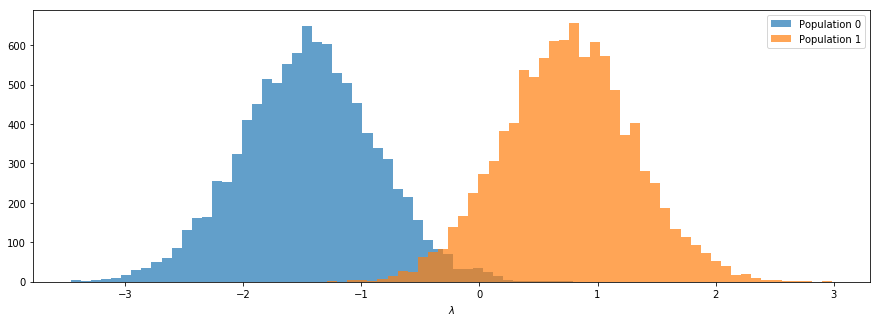

In [21]:
def projektion(x, _lambda):
    buffer_x = []
    buffer_y = []
    buffer = []
    for i in tqdm(range(len(x[:]))):
        buffer_x.append(x[i, 0] * _lambda[0])
        buffer_y.append(x[i, 1] * _lambda[1])
    return np.array([x + y for x, y in zip(buffer_x, buffer_y)])

# Daten auf Projektionsvektor abbilden
population_0_projektion = projektion(x=population_0, _lambda=projektion_0_1)
population_1_projektion = projektion(x=population_1, _lambda=projektion_0_1)

plt.clf()
plt.figure(figsize = [15, 5])
plt.hist(population_0_projektion * projektion_0_1[0], alpha = 0.7,
         label = 'Population 0', color=r'C0', bins = 50)
plt.hist(population_1_projektion * projektion_0_1[0], alpha = 0.7,
         label = 'Population 1', color=r'C1', bins = 50)
plt.xlabel(r'$\lambda$')
plt.legend(loc='best')
plt.show()

<Figure size 432x288 with 0 Axes>

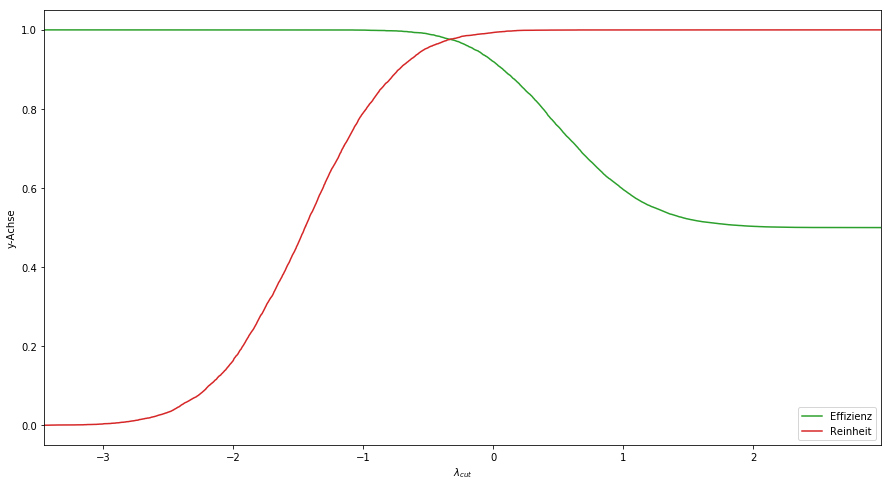

In [22]:
# Population 0 ist das Signal und Population 1 der Untergund

# Funkiton für das Bestimmen der Reinheit und der Effizienz
def effizienz_reinheit(signal, untergrund, schnitt):
    effizienz = []
    reinheit = []
    for i in schnitt:
        # true positive Werte bestimmen
        tp = len(signal[signal<=i])
        # false positive Werte bestimmen
        fp = len(untergrund[untergrund<=i])
        # false begative Werte bestimmen
        fn = len(signal[signal>i])
        # Formel der Effizienz
        effizienz.append(tp / (tp + fp))
        # Formel der Reinheit
        reinheit.append(tp / (tp + fn))
    return effizienz, reinheit

# Schnittpunkte wählen
schnittpkt = np.linspace(min(population_0_projektion * projektion_0_1[0]),
                         max(population_1_projektion * projektion_0_1[0]), 10000)

pop_0_projiziert = (population_0_projektion * projektion_0_1[0]).T
pop_1_projiziert = (population_1_projektion * projektion_0_1[0]).T

# Reinheit und Effizienz bestimmen
effizienz, reinheit = effizienz_reinheit(pop_0_projiziert, pop_1_projiziert, schnittpkt)

# Plotten der Ergebnisse
plt.clf()
plt.figure(figsize = [15, 8])
plt.plot(schnittpkt, effizienz, color='C2', label='Effizienz')
plt.plot(schnittpkt, reinheit, color='C3', label='Reinheit')
plt.xlim(min(population_0_projektion * projektion_0_1[0]),
         max(population_1_projektion * projektion_0_1[0]))
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('y-Achse')
plt.legend()
plt.show()

### f.)

<Figure size 432x288 with 0 Axes>

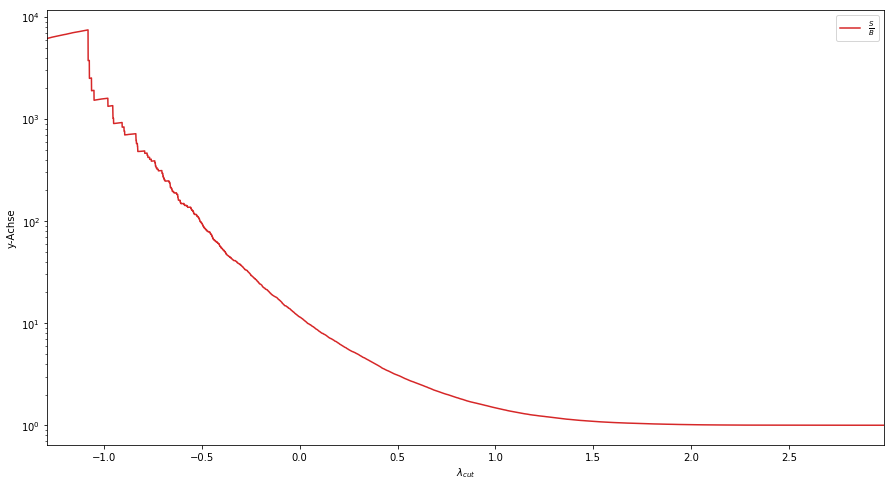

Das Verhältnis S / B wird maximal, wenn kein Wert des Untergrundes in dem Signal liegt.
Für die betrachteten Populationen ist wird S / B für lambde_cut = -1.2907813763526144 maximal.


In [23]:
# Funktion, die das Signal zu Untergrund Verhältns ausrechnet
def signal_zu_untergrund(signal, untergrund, schnitt):
    signal_nach_schnitt = []
    untergrund_nach_schnitt = []
    # Bestimme S / B für verschiedene Schnittpunkte lambda_cut
    for i in schnitt:
        signal_nach_schnitt.append(len(signal[signal <= i]))
        untergrund_nach_schnitt.append(len(untergrund[untergrund <= i]))
    # Zurückgeben von S / B für jedes Element einzeln, mit der Bedingung, dass B nicht 0 sein darf    
    return [x / y for x,y in zip(signal_nach_schnitt, untergrund_nach_schnitt) if not y==0]
    
S_B_verhältnis = signal_zu_untergrund(pop_0_projiziert, pop_1_projiziert, schnittpkt)

plt.clf()
plt.figure(figsize = [15, 8])
plt.plot(schnittpkt[len(schnittpkt) - len(S_B_verhältnis):],
         S_B_verhältnis, color='C3', label=r'$\frac{S}{B}$')
plt.xlim(min(schnittpkt[len(schnittpkt) - len(S_B_verhältnis):]),
         max(schnittpkt[len(schnittpkt) - len(S_B_verhältnis):]))
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('y-Achse')
plt.yscale('log')
plt.legend()
plt.show()

print(f'Das Verhältnis S / B wird maximal, wenn kein Wert des Untergrundes in dem Signal liegt.\nFür die betrachteten Populationen ist wird S / B für lambde_cut = {schnittpkt[len(schnittpkt) - len(S_B_verhältnis)]} maximal.')

$\lambda_{cut_{max \frac{S}{B}}}$ ist somit ca. - 1,3.

### g.)

<Figure size 432x288 with 0 Axes>

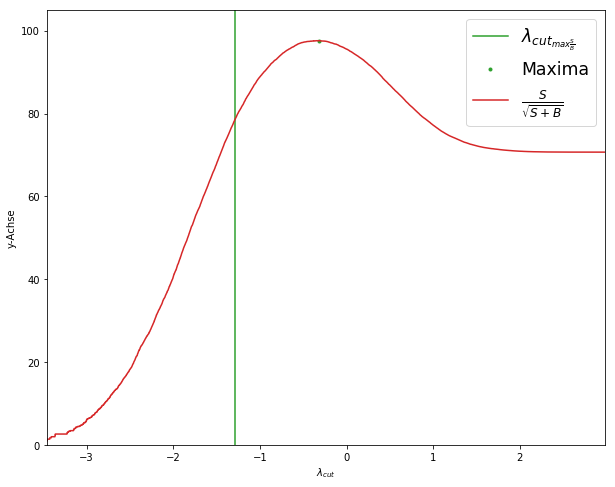

Die Maximale Signifikanz wird für lambde_cut = -3.4567008240509325 erreicht.


In [24]:
## Trennung der Signifikanz
# ähnlciher Algorithmus wie bei f.)
def siginifikanz(signal, untergrund, schnitt):
    signal_nach_schnitt = []
    untergrund_nach_schnitt = []
    for i in schnitt:
        signal_nach_schnitt.append(len(signal[signal <= i]))
        untergrund_nach_schnitt.append(len(untergrund[untergrund <= i]))
    # Zurückgeben von S / sqrt(S + B) für jedes Element einzeln, mit der Bedingung, dass B nicht 0 sein darf    
    return [x / np.sqrt(x + y) for x,y in zip(signal_nach_schnitt, untergrund_nach_schnitt) if not np.sqrt(x + y)==0]

siginifikanz = siginifikanz(pop_0_projiziert, pop_1_projiziert, schnittpkt)

plt.clf()
plt.figure(figsize = [10, 8])
plt.plot([schnittpkt[len(schnittpkt) - len(S_B_verhältnis)],
          schnittpkt[len(schnittpkt) - len(S_B_verhältnis)]],
         [0, 105],
         label=r'$\lambda_{cut_{max \frac{S}{B}}}$', color = 'C2')
plt.plot(schnittpkt[siginifikanz == max(siginifikanz)],
         max(siginifikanz), '.',
         label='Maxima', color = 'C2')
plt.plot(schnittpkt[len(schnittpkt) - len(siginifikanz):],
         siginifikanz, color='C3',
         label=r'$\frac{S}{\sqrt{S + B}}$')
plt.xlim(min(schnittpkt[len(schnittpkt) - len(siginifikanz):]),
         max(schnittpkt[len(schnittpkt) - len(siginifikanz):]))
plt.ylim(0, 105)
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('y-Achse')
plt.legend(fontsize = 'xx-large')
plt.show()

print(f'Die Maximale Signifikanz wird für lambde_cut = {schnittpkt[len(schnittpkt) - len(siginifikanz)]} erreicht.')